## Уровень 0:

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)

Надо:

- Изобразить вектора на экране
- Изобразить точку x + y + z
- Найти угол между векторами x и y

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

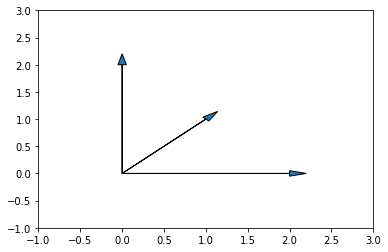

In [36]:
# Изобразить вектора на экране
ax = plt.axes()

plt.xlim( [-1, 3] )
plt.ylim( [-1, 3] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2)
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2)
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2)

plt.show()


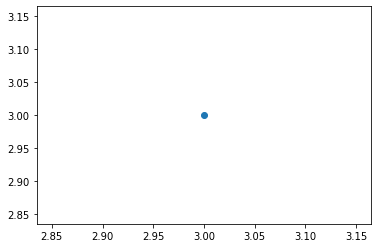

In [37]:
#Изобразить точку x + y + z
i = x+y+z
plt.plot(i[0], i[1], 'o')
plt.show()

In [42]:
from numpy import linalg
#Найти угол между векторами x и y
def cosine(x, y):
    """
    Подсчет  угла между векторами x,y по их координатам
    """
    
    # длины векторов
    xLength = np.linalg.norm( x )
    yLength = np.linalg.norm( y )

    
    return np.dot(x,y) / ( xLength * yLength)

np.arccos(cosine(x,y)) * 360 / 2 / np.pi

45.00000000000001

## Уровень 1
Даны дома из Бостона


Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
Написать код разложения дома по указанному базису

In [12]:
import numpy as np
import pandas as pd

In [43]:
houses = pd.read_csv('boston_data.csv')
del houses['medv']
houses

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77


In [46]:
# берем 13 случайных домов
houses_basis = houses.sample(13)

In [58]:
houses_basis

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
356,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
194,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90
216,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
334,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
172,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
81,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
376,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
222,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
386,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
375,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97


In [55]:
houses_basis.values

array([[1.30580e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.47000e-01,
        5.87200e+00, 7.31000e+01, 2.47750e+00, 6.00000e+00, 4.32000e+02,
        1.78000e+01, 3.38630e+02, 1.53700e+01],
       [6.56650e-01, 2.00000e+01, 3.97000e+00, 0.00000e+00, 6.47000e-01,
        6.84200e+00, 1.00000e+02, 2.01070e+00, 5.00000e+00, 2.64000e+02,
        1.30000e+01, 3.91930e+02, 6.90000e+00],
       [6.07600e-02, 0.00000e+00, 1.19300e+01, 0.00000e+00, 5.73000e-01,
        6.97600e+00, 9.10000e+01, 2.16750e+00, 1.00000e+00, 2.73000e+02,
        2.10000e+01, 3.96900e+02, 5.64000e+00],
       [1.44550e-01, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
        6.17200e+00, 9.61000e+01, 5.95050e+00, 5.00000e+00, 3.11000e+02,
        1.52000e+01, 3.96900e+02, 1.91500e+01],
       [8.02710e-01, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.45600e+00, 3.66000e+01, 3.79650e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 2.88990e+02, 1.16900e+01],
       [9.72418e+00, 0.00000e+

In [51]:
# Считаем их определитель, чтобы он не был равен нулю
np.linalg.det(houses_basis)

6150626556985.245

In [65]:
# берем еще один случайный дом, чтобы разложить его по базису
random_house_id = houses.sample(1).index[0]
random_house_id

118

In [75]:
random_house = houses.iloc[random_house_id].values
random_house

array([1.6760e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01,
       6.4260e+00, 5.2300e+01, 4.5404e+00, 5.0000e+00, 2.8700e+02,
       1.9600e+01, 3.9690e+02, 7.2000e+00])

In [78]:
# Раскладываем дом по базису
result = np.linalg.solve(houses_basis.values,random_house)
result

array([  57.81466387,   36.977486  ,   24.2927423 ,  943.18909826,
       -877.02863041, -260.72650774,   -3.62919389,  -33.42267638,
        -60.55077894,    2.3495492 ,   29.5102691 ,    3.28563237,
        -11.79764372])